# 机器学习课程(2)--多项式回归
---

### 目录索引

- <a href="#多项式回归介绍"> 多项式回归介绍</a>
- <a href="#多项式回归基础和实现">多项式回归基础和实现</a>
- <a href="#scikit-learn进行多项式拟合">scikit-learn进行多项式拟合</a>
- <a href="#线性回归预测实战">线性回归预测实战</a>
- <a href="#实验总结">实验总结</a>

In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
% matplotlib inline

---

## 多项式回归介绍

在线性回归中，我们通过建立自变量 `x` 的一次方程来拟合数据。而非线性回归中，则需要建立因变量和自变量之间的非线性关系。从直观上讲，也就是拟合的直线变成了「曲线」。

如下图所示，是某地区人口数量的变化数据。如果我们使用线性方差去拟合数据，那么就会存在「肉眼可见」的误差。而对于这样的数据，使用一条曲线去拟合则更符合数据的发展趋势。

![此处输入图片的描述](https://ws4.sinaimg.cn/large/006tNbRwly1fvaiujd582j30h307bdgt.jpg)

对于非线性回归问题而言，最简单也是最常见的方法就是本次实验要讲解的「多项式回归」。多项式是中学时期就会接触到的概念，这里引用 [维基百科](https://zh.wikipedia.org/wiki/%E5%A4%9A%E9%A0%85%E5%BC%8F) 的定义如下：

> 多项式（Polynomial）是代数学中的基础概念，是由称为未知数的变量和称为系数的常量通过有限次加法、加减法、乘法以及自然数幂次的乘方运算得到的代数表达式。多项式是整式的一种。未知数只有一个的多项式称为一元多项式；例如 $x^2-3x+4$ 就是一个一元多项式。未知数不止一个的多项式称为多元多项式，例如 $x^3-2xyz^2+2yz+1$ 就是一个三元多项式。<br>
- **P.S. : 这里可以将多项式的概念与单项式的概念相比较**

## 多项式回归基础和实现

### 多项式回归基础

首先，一个标准的一元高阶多项式函数如下所示：
$$ y(x, w) = w_0 + w_1x + w_2x^2 +...+w_mx^m = \sum\limits_{j=0}^{m}w_jx^j \tag{1} $$

其中，$m$ 表示多项式的阶数，$x^j$ 表示 $x$ 的 $j$ 次幂，$w$ 则代表该多项式的系数。

当我们使用上面的多项式去拟合散点时，需要确定两个要素，分别是：多项式系数 $w$ 以及多项式阶数 $m$，这也是多项式的两个基本要素。

如果通过手动指定多项式阶数 $m$ 的大小，那么就只需要确定多项式系数 $w$ 的值是多少。例如，这里首先指定 $m=2$，多项式就变成了：


$$ y(x, w) = w_0 + w_1x + w_2x^2= \sum\limits_{j=0}^{2}w_jx^j \tag{2} $$

当我们确定 $w$ 的值的大小时，就回到了前面线性回归中学习到的内容。<br>

- 小结思路：<br>
多项式主要确定的参数有两个：`w`和`m`，也就是 多项式的系数 和 多项式的阶数；<br>
另一个关键点是多项式的实现方法，一般是思路是先将`多项式回归问题`转化`为线性回归问题`。

### 多项式回归实现

首先了解一下我们需要的哪些参数：`w`,`x`,`y`, 其中`w`我们需要 随机初始化 一下才能运用 Scipy 提供的最小二乘法函数得到最佳拟合参数
1. 需要定义 n次多项式函数，残差函数<br>
2. 运用 scipy.optimize.leastsq 来拟合最佳参数

In [26]:
from scipy.optimize import leastsq
# 这里用 p 来收集 w 
# p_init = np.random.randn(n) 随机生成n个随机数

def ploy_func(p,x):
    '''
    构造n次多项式函数
    
    输入参数
    p: 以np.array的格式输入，w 向量 
    x: x向量
    
    return: f(x) 
    '''
    f = np.poly1d(p)
    return f(x)

def err_func(p,x,y):
    '''
    构造观测值和拟合值之差的函数
    
    p: 以np.array的格式输入，w 向量 
    x: x向量
    y: y向量
    
    return: res 残差值
    '''
    res = ploy_func(p,x)-y
    return res

def nploy_fit(n,x,y):
    '''
    构造观测值和拟合值之差的函数
    
    p: 以np.array的格式输入，w 向量 
    x: x向量 (list)
    y: y向量 (list)
    
    return: para[0] 
    '''
    p_init = np.random.randn(n)
    para = leastsq(err_func,p_init,args=(np.array(x),np.array(y)))
    return para[0]

In [27]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

nploy_fit(3,x,y)

array([  8.00078073e-03,  -2.60474143e-01,   3.76893117e+01])

NumPy 中的多项式函数 `np.poly1d(3)` 默认的样式是：

$$ y(x) = 0.0080*x^2 - 0.26*x + 37\tag{4} $$

接下来，我们绘制出 3，4，5，6，7, 8 次多项式的拟合结果。

Text(0.5,1,'m = 8')

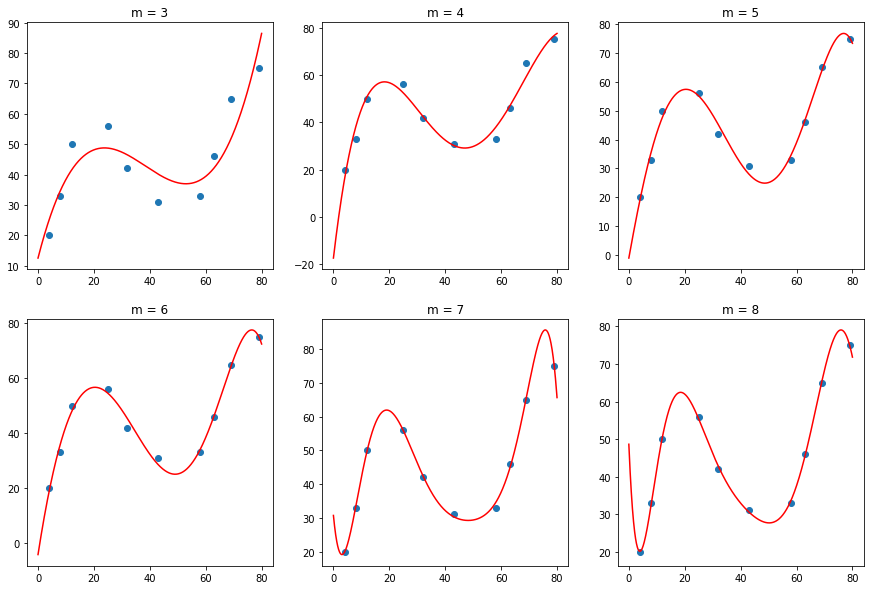

In [50]:
"""
绘制出 3，4，5，6，7, 8 次多项式的拟合图像
"""
# 定义绘图要的x_tmp点
x_tmp = np.linspace(0,80,1000)

# 绘制子图
fig,axes=plt.subplots(2,3,figsize=(15,10))

axes[0,0].plot(x_tmp, ploy_func(nploy_fit(4,x,y), x_tmp), 'r')  #!! 这里的n次多项式函数是由nploy_fit产生参数W和x_tmp来生成
axes[0,0].scatter(x, y)
axes[0,0].set_title("m = 3")   # 注意nploy_fit 里4次，实际多项式是3次，因为包含常数项

axes[0,1].plot(x_tmp, ploy_func(nploy_fit(5,x,y), x_tmp), 'r')  #!!
axes[0,1].scatter(x, y)
axes[0,1].set_title("m = 4")

axes[0,2].plot(x_tmp, ploy_func(nploy_fit(6,x,y), x_tmp), 'r')  #!!
axes[0,2].scatter(x, y)
axes[0,2].set_title("m = 5")

axes[1,0].plot(x_tmp, ploy_func(nploy_fit(7,x,y), x_tmp), 'r')  #!!
axes[1,0].scatter(x, y)
axes[1,0].set_title("m = 6")

axes[1,1].plot(x_tmp, ploy_func(nploy_fit(8,x,y), x_tmp), 'r')  #!!
axes[1,1].scatter(x, y)
axes[1,1].set_title("m = 7")

axes[1,2].plot(x_tmp, ploy_func(nploy_fit(9,x,y), x_tmp), 'r')  #!!
axes[1,2].scatter(x, y)
axes[1,2].set_title("m = 8")

从上面的 `6` 张图可以看出，当 `m=4`（4 次多项式） 时，图像拟合的效果已经明显优于 `m=3` 的结果。但是随着 m 次数的增加，当 m=8 时，曲线呈现出明显的震荡，这也就是线性回归实验中所讲到的过拟和（Overfitting）现象。

## scikit-learn进行多项式拟合

大体思路：<br>
1. 先用 `sklearn.preprocessing.PolynomialFeatures类` 来产生多项式特征矩阵
2. 再用 `sklearn.linear_model.LinearRegression` 来训练线性模型

In [70]:
# 加载示例数据
x = [4, 8, 12, 25, 32, 43, 58, 63, 69, 79]
y = [20, 33, 50, 56, 42, 31, 33, 46, 65, 75]

In [54]:
from sklearn.preprocessing import PolynomialFeatures

x_reshape = np.array(x).reshape(len(x),1)
y_reshape = np.array(y).reshape(len(y),1)

poly_x = PolynomialFeatures(degree=2,include_bias=False).fit_transform(x_reshape) #生成多项式特征矩阵

In [57]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(poly_x,y)

model.coef_,model.intercept_     #模型的参数

(array([-0.26047408,  0.00800078]), 37.689310828012935)

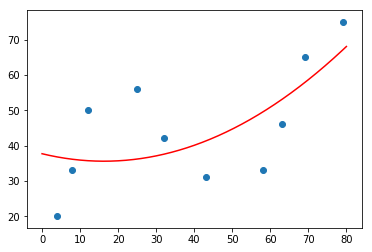

In [72]:
# 用得出的模型来画图表示拟合的结果

x_tmp = np.linspace(0,80,1000)
x_tmp = np.array(x_tmp).reshape(len(x_tmp),1) #转列向量

poly_x_tmp = PolynomialFeatures(degree=2,include_bias=False).fit_transform(x_tmp)
plt.plot(x_tmp,model.predict(poly_x_tmp),'r')
plt.scatter(x,y)